## **Import Required Libraries**

In [30]:
import os
import sys
from pathlib import Path
from dotenv import load_dotenv
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [31]:
## ignore warnings
warnings.filterwarnings("ignore")

## **Install Dependencies**

In [32]:
!{sys.executable} -m pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Setup Working Directory**

In [33]:
## Add project root to system path
CURRENT_DIR=Path.cwd()
PROJECT_ROOT=CURRENT_DIR

while not (PROJECT_ROOT/'src').exists() and PROJECT_ROOT!=PROJECT_ROOT.parent:
    PROJECT_ROOT=PROJECT_ROOT.parent 

if not (PROJECT_ROOT/'src').exists():
    raise Exception("Could not find the 'src' folder.Check the folder structure")

## add project root to the python path
sys.path.insert(0,str(PROJECT_ROOT))

from src.context_engineering.config import(
    VECTOR_DIR,EMBEDDING_MODEL,CRAWL_OUT_DIR,PROVIDER,get_api_keys
)

openrouter_api_key=get_api_keys(provider="openrouter",env_path=PROJECT_ROOT/".env")
openai_api_key=get_api_keys(provider="open-ai",env_path=PROJECT_ROOT/".env")

## check whether API keys there or not
if not  openrouter_api_key or not openai_api_key:
    raise ValueError(
        "API keys are not Found.\n"
        "Please add those API keys into the .env file if there is anything missing."
    )

print("="*60)
print("Enviroment Loadeding............")
print("="*60)

print(f"Provider:{PROVIDER}")
print(f"Project Root Directory:{PROJECT_ROOT}")
print("✅Environment Loaded")

Enviroment Loadeding............
Provider:openrouter
Project Root Directory:c:\UOC pdf\AI Engineering Bootcamp\mini-project-03
✅Environment Loaded


## **Chunking Strategies**

In [34]:
from src.context_engineering.chunking.chunkers import Chunking

print("Chunking strategies loaded from the chunking layer")
print("Location:src.context_engineering.chunking")
print("="*60)
print("Available Chunking Strategies:")

print("   1. semantic_chunk      - Split by heading structure")
print("   2. fixed_chunk         - Uniform token chunks with overlap")
print("   3. sliding_chunk       - Overlapping windows for better recall")
print("   4. parent_child_chunk  - Two-tier parent-child chunking")
print("   5. late_chunk          - Large base chunks (late splitting)")
print("   🔄 late_retrieval      - Split + context window (retrieval phase)")

Chunking strategies loaded from the chunking layer
Location:src.context_engineering.chunking
Available Chunking Strategies:
   1. semantic_chunk      - Split by heading structure
   2. fixed_chunk         - Uniform token chunks with overlap
   3. sliding_chunk       - Overlapping windows for better recall
   4. parent_child_chunk  - Two-tier parent-child chunking
   5. late_chunk          - Large base chunks (late splitting)
   🔄 late_retrieval      - Split + context window (retrieval phase)


## **Load Prime Lands Corpus**

In [35]:
## open and read jsonl file 
corpus_path=PROJECT_ROOT/CRAWL_OUT_DIR/"prime_lands_corpus.jsonl"

if not corpus_path.exists():
    raise FileNotFoundError("Corpus can't be found in provided directory.")

with open(corpus_path,"r",encoding="UTF-8") as f:
    documents=[json.loads(line) for line in f]

print("="*60)
print("Loading Documents..............")
print("="*60)
print(f"Numbebr of Documents:{len(documents)}")
print(f"Total content size: {sum(len(d['content']) for d in documents):,} chars")
print("Document Loaded")

Loading Documents..............
Numbebr of Documents:20
Total content size: 50,479 chars
Document Loaded


## **Apply Each Chunking Strategies**

In [36]:
## create an object from chunking class
corpus_chunkers=Chunking()
## save directory
SAVE_DIR=PROJECT_ROOT/CRAWL_OUT_DIR

#### **Fixed Chunking Strategy**

In [37]:
## fixed chunking strategy
print("="*60)
print("Running fixed chunking strategy...........")
fixed_chunks=corpus_chunkers.chunk_strategy(documents=documents,strategy="fixed")

with open(SAVE_DIR/"fixed_chunking.jsonl","w",encoding="UTF-8") as f:
    for fixed_chunk in fixed_chunks:
        f.write(json.dumps(fixed_chunk,ensure_ascii=False)+'\n')

print("Fixed chunking completed")

Running fixed chunking strategy...........
Fixed chunking completed


#### **Sementic Chunking Strategy**

In [38]:
## sementic chunking strategy
print("="*60)
print("Running sementic chunking strategy..............")
sementic_chunks=corpus_chunkers.chunk_strategy(documents=documents,strategy="semantic")

with open(SAVE_DIR/"sementic_chunking.jsonl","w",encoding="UTF-8") as f:
    for sementic_chunk in sementic_chunks:
        f.write(json.dumps(sementic_chunk,ensure_ascii=False)+'\n')
        
print("Sementic chunking completed")

Running sementic chunking strategy..............
Sementic chunking completed


#### **Sliding Window Chunking**

In [39]:
## sliding window strategy
print("="*60)
print("Running sliding window strategy............")
sliding_window_chunks=corpus_chunkers.chunk_strategy(documents=documents,strategy="sliding")

with open(SAVE_DIR/"sliding_window_chunking.jsonl","w",encoding="UTF-8") as f:
    for sliding_chunk in sliding_window_chunks:
        f.write(json.dumps(sliding_chunk,ensure_ascii=False)+'\n')

print("Sliding window chunking completed")

Running sliding window strategy............
Sliding window chunking completed


#### **Parent-Child Chunking**

In [40]:
## parent-child strategy
print("="*60)
print("Running parent-child chunking srategy...........")
parent_child_chunks=corpus_chunkers.chunk_strategy(documents=documents,strategy="parent_child")

with open(SAVE_DIR/"parent_child_chunking.jsonl","w",encoding="UTF-8") as f:
    for parent_child_chunk in parent_child_chunks:
        f.write(json.dumps(parent_child_chunk,ensure_ascii=False)+'\n')

print("Parent-child chunking completed")

Running parent-child chunking srategy...........
Parent-child chunking completed


#### **Late Chunking**

In [41]:
## Late chunking strategy
print("="*60)
print("Running late chunking strategy............")
late_chunks=corpus_chunkers.chunk_strategy(documents=documents,strategy="late")

with open(SAVE_DIR/"late_chunking.jsonl","w",encoding="UTF-8") as f:
    for late_chunk in late_chunks:
        f.write(json.dumps(late_chunk,ensure_ascii=False)+'\n')

print("Late chunking completed")

Running late chunking strategy............
Late chunking completed


## **Token Validation Each Chunking**

#### **Fixed Chunking**

In [42]:
## get the token counts
fixed_token_count=[fixed_chunk["token_count"] for fixed_chunk in fixed_chunks]

print(f"Average token count:{np.mean(fixed_token_count)}")
print(f"Minimum token count:{np.min(fixed_token_count)}")
print(f"Maximum token count:{np.max(fixed_token_count)}")
print(f"95 th percentile of the token count:{np.quantile(fixed_token_count,0.95)}")
print(f"25 th percenetile of the token count:{np.percentile(fixed_token_count,0.25)}")

Average token count:714.55
Minimum token count:150
Maximum token count:758
95 th percentile of the token count:754.2
25 th percenetile of the token count:177.74


#### **Sementic Chunking**

In [43]:
## get the token counts
sementic_token_count=[sementic_chunk["token_count"] for sementic_chunk in sementic_chunks]

print(f"Average token count:{np.mean(sementic_token_count)}")
print(f"Minimum token count:{np.min(sementic_token_count)}")
print(f"Maximum token count:{np.max(sementic_token_count)}")
print(f"95 th percentile of the token count:{np.quantile(sementic_token_count,0.95)}")
print(f"25 th percenetile of the token count:{np.percentile(sementic_token_count,0.25):.2f}")

Average token count:708.7
Minimum token count:147
Maximum token count:752
95 th percentile of the token count:748.2
25 th percenetile of the token count:174.60


#### **Sliding-Window Chunking**

In [44]:
## get the token counts
sliding_token_count=[sliding_chunk["token_count"] for sliding_chunk in sliding_window_chunks]

print(f"Average token count:{np.mean(sliding_token_count):.2f}")
print(f"Minimum token count:{np.min(sliding_token_count)}")
print(f"Maximum token count:{np.max(sliding_token_count)}")
print(f"95 th percentile of the token count:{np.quantile(sliding_token_count,0.95)}")
print(f"25 th percenetile of the token count:{np.percentile(sliding_token_count,0.25)}")

Average token count:395.66
Minimum token count:150
Maximum token count:568
95 th percentile of the token count:566.3
25 th percenetile of the token count:152.85


#### **Parent-Child Chunking**

In [45]:
## get the token counts for parent chunking
parent_token_count=[parent_chunk["token_count"] for parent_chunk in parent_child_chunks[0]]

print(f"Average token count:{np.mean(parent_token_count):.2f}")
print(f"Minimum token count:{np.min(parent_token_count)}")
print(f"Maximum token count:{np.max(parent_token_count)}")
print(f"95 th percentile of the token count:{np.quantile(parent_token_count,0.95)}")
print(f"25 th percenetile of the token count:{np.percentile(parent_token_count,0.25)}")

Average token count:714.55
Minimum token count:150
Maximum token count:758
95 th percentile of the token count:754.2
25 th percenetile of the token count:177.74


In [46]:
## get the token counts for child chunking
child_token_count=[child_chunk["token_count"] for child_chunk in parent_child_chunks[1]]

print(f"Average token count:{np.mean(child_token_count):.2f}")
print(f"Minimum token count:{np.min(child_token_count)}")
print(f"Maximum token count:{np.max(child_token_count)}")
print(f"95 th percentile of the token count:{np.quantile(child_token_count,0.95)}")
print(f"25 th percenetile of the token count:{np.percentile(child_token_count,0.25)}")

Average token count:209.05
Minimum token count:98
Maximum token count:277
95 th percentile of the token count:274.0
25 th percenetile of the token count:98.0


#### **Distribution plots**

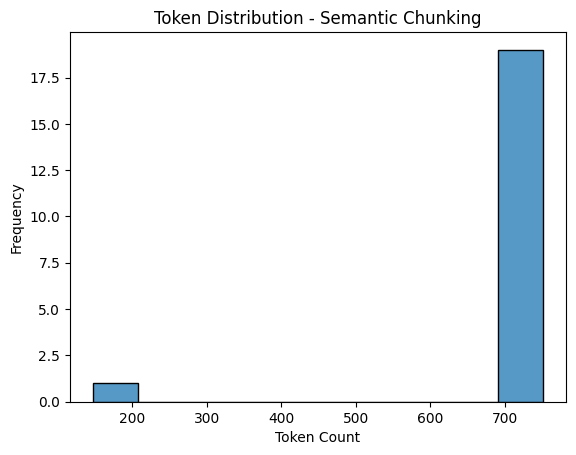

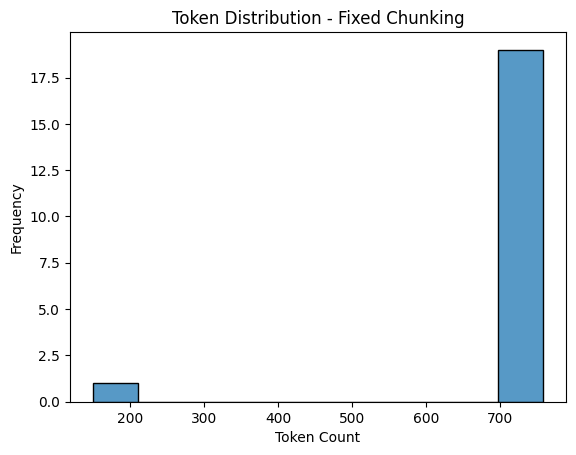

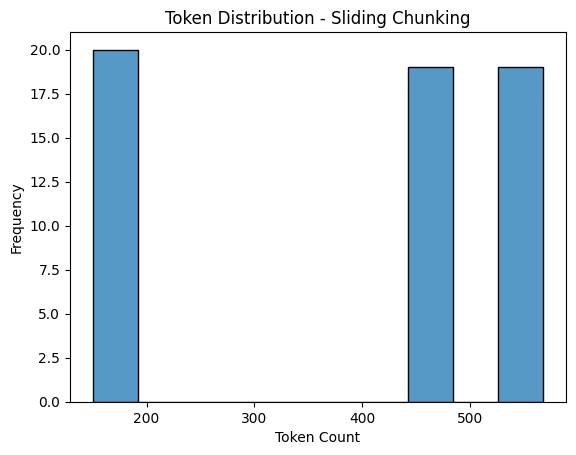

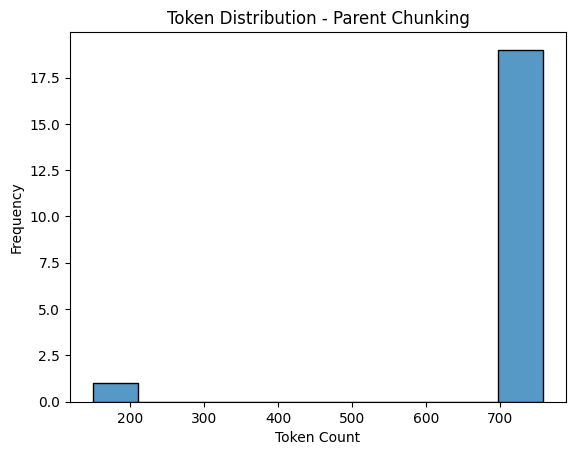

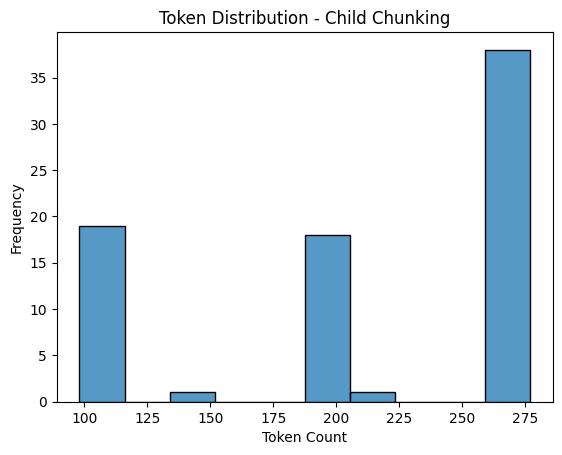

In [47]:
methods = {
    "Semantic": sementic_token_count,
    "Fixed": fixed_token_count,
    "Sliding": sliding_token_count,
    "Parent":parent_token_count,
    "Child":child_token_count
}

for name, tokens in methods.items():
    plt.figure()
    sns.histplot(tokens, bins=10)
    
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.title(f"Token Distribution - {name} Chunking")
    
    plt.show()

## **Buid Qdrant vector DB index**

#### **Load Embedding Model**

In [48]:
## load model
from src.context_engineering.services.embedding import _get_embedding_model
embedding_model=_get_embedding_model(env_path=PROJECT_ROOT/".env")

print(f"✅ Embeddings initialized: {EMBEDDING_MODEL}")
print(f"🌐 Provider: {PROVIDER}")

✅ Embeddings initialized: openai/text-embedding-3-large
🌐 Provider: openrouter


#### **Initialize the Qdrant Vector DB**

In [49]:
from qdrant_client import QdrantClient
from qdrant_client.http.models import VectorParams,Distance

## import qdrant configuration paramters(URL and API key)
qdrant_configurations=get_api_keys(provider="qdrant",env_path=PROJECT_ROOT/".env")

## initialize the qdrant client
client=QdrantClient(
    url=qdrant_configurations["url"],
    api_key=qdrant_configurations["key"],
    timeout=30
)


In [50]:
collection_name = "Real-Estate-AI-Assistant"

if not client.collection_exists(collection_name):
    client.create_collection(
        collection_name=collection_name,
        vectors_config=VectorParams(
            size=3072,
            distance=Distance.COSINE
        )
    )

ResponseHandlingException: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond